In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../input/train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
data[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


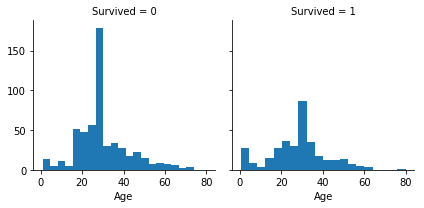

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.FacetGrid(data,col='Survived')
a.map(plt.hist,'Age',bins=20)
plt.show()

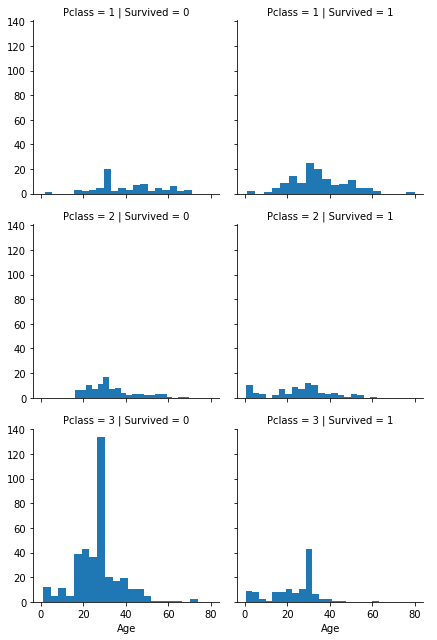

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.FacetGrid(data,col='Survived',row='Pclass')
a.map(plt.hist,'Age',bins=20)
a.add_legend()
plt.show()

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data = data.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

In [13]:
y = data['Survived']

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [15]:
x=data
x = x.drop(['Survived'],axis=1)

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
x.iloc[0]

PassengerId     1.00
Pclass          3.00
Sex             1.00
Age            22.00
SibSp           1.00
Parch           0.00
Fare            7.25
Name: 0, dtype: float64

In [18]:
a = kmeans.predict(x)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y,a)

0.49158249158249157

In [20]:
correct = 0
for i in range(len(x)):
    predict = np.array(x.iloc[i])
    print("Row : ",predict)
    predict = predict.reshape(-1,len(predict))
    prediction = kmeans.predict(predict)
    if(prediction[0] == y[i]):
        correct += 1
        
print(correct/len(x))

Row :  [ 1.    3.    1.   22.    1.    0.    7.25]
Row :  [ 2.      1.      0.     38.      1.      0.     71.2833]
Row :  [ 3.     3.     0.    26.     0.     0.     7.925]
Row :  [ 4.   1.   0.  35.   1.   0.  53.1]
Row :  [ 5.    3.    1.   35.    0.    0.    8.05]
Row :  [ 6.          3.          1.         29.69911765  0.          0.
  8.4583    ]
Row :  [ 7.      1.      1.     54.      0.      0.     51.8625]
Row :  [ 8.     3.     1.     2.     3.     1.    21.075]
Row :  [ 9.      3.      0.     27.      0.      2.     11.1333]
Row :  [10.      2.      0.     14.      1.      0.     30.0708]
Row :  [11.   3.   0.   4.   1.   1.  16.7]
Row :  [12.    1.    0.   58.    0.    0.   26.55]
Row :  [13.    3.    1.   20.    0.    0.    8.05]
Row :  [14.     3.     1.    39.     1.     5.    31.275]
Row :  [15.      3.      0.     14.      0.      0.      7.8542]
Row :  [16.  2.  0. 55.  0.  0. 16.]
Row :  [17.     3.     1.     2.     4.     1.    29.125]
Row :  [18.          2.     

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

kmeans.fit(x_scale)

a = kmeans.predict(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [22]:
accuracy_score(y,a)

0.37373737373737376